In [1]:
! tree

.
├── animation.gif
├── Assignment 3.1.ipynb
├── Assignment 3.2.ipynb
├── Assignment 3-Copy1.2.ipynb
├── Cluster_lib.ipynb
├── Data
│   ├── cereal.xls
│   └── NewMBAdata.xlsx
├── import.py
├── k_mean.py
├── None0000000.png
├── output_1
│   ├── animation.gif
│   ├── Initial_Data.png
│   ├── STEP_1.png
│   ├── STEP_2.png
│   ├── STEP_3.png
│   ├── STEP_4.png
│   └── University.csv
├── output_2
└── __pycache__
    └── k_mean.cpython-36.pyc

4 directories, 18 files


# 1.1 Importing common libraries

In [2]:
# %load ../import.py
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt



# 1.2 Imporitng custom library

In [3]:
from k_mean import k_mean
###Syntax:
# k_mean(df,X,N)
### INput
# df
# X
# N
### Output
# df : moddified with all steps 
# iteration: number of iteration

from k_mean import pca_retirever
### Syntax
# pca_retirever(df, X)
### INput
#df
#X
### Output
#df



from k_mean import plotter
### Syntax
# plotter(df, iteration)
### INput
# df
# iteration
### Output
# anim : plt object


from k_mean import final_answer
### Syntax
# final_answer(df, iteration,y, file_name, output_dir):

### INput
# df
# iteration
# y
# file_name

### Output
# df_out: 
# file daved at location


from k_mean import plot_printer
# def plot_printer(df, iteration, output_dir):

### INput
# df
# iteration
# output_dir


# 2. Question 

#### 1.     ## 2.      The file cereal.xls contains calories, protein, fat, sugar, sodium, fiber, carbs, sugar, and potassium content per ounce for 43 breakfast cereals. Use this data to perform a cluster analysis with five anchors.



# 3. Importing data  

In [4]:
df=pd.read_excel("./Data/cereal.xls")
df.head()

,Rank,Cereal,Cal,Protein,Fat,Sodium,Fiber,Carbs,Sugar,Potassium
0,1,ACCheerios,110,2,2,180,1.5,10.5,10,70
1,2,Cheerios,110,6,2,290,2.0,17.0,1,105
2,3,CocoaPuffs,110,1,1,180,0.0,12.0,13,55
3,4,CountChocula,110,1,1,180,0.0,12.0,13,65
4,5,GoldenGrahams,110,1,1,280,0.0,15.0,9,45


In [5]:
df.columns

Index(['Rank', 'Cereal', 'Cal', 'Protein', 'Fat', 'Sodium', 'Fiber', 'Carbs',
       'Sugar', 'Potassium'],
      dtype='object')

# 4. Setting Parameters 


## 4.1 Renaming columns

In [6]:
df.columns=['Rank','Cereal', 'Cal', 'Protein', 'Fat', 'Sodium', 'Fiber', 'Carbs', 'Sugar',
       'Potassium']
df.columns
df.head()

,Rank,Cereal,Cal,Protein,Fat,Sodium,Fiber,Carbs,Sugar,Potassium
0,1,ACCheerios,110,2,2,180,1.5,10.5,10,70
1,2,Cheerios,110,6,2,290,2.0,17.0,1,105
2,3,CocoaPuffs,110,1,1,180,0.0,12.0,13,55
3,4,CountChocula,110,1,1,180,0.0,12.0,13,65
4,5,GoldenGrahams,110,1,1,280,0.0,15.0,9,45


## 4.2 Identyfying X

In [7]:
X=['Cal', 'Protein', 'Fat', 'Sodium', 'Fiber', 'Carbs', 'Sugar',
       'Potassium']
df[X].head()

,Cal,Protein,Fat,Sodium,Fiber,Carbs,Sugar,Potassium
0,110,2,2,180,1.5,10.5,10,70
1,110,6,2,290,2.0,17.0,1,105
2,110,1,1,180,0.0,12.0,13,55
3,110,1,1,180,0.0,12.0,13,65
4,110,1,1,280,0.0,15.0,9,45


## 4.3 Identyfying y

In [8]:
y=["Cereal"]
df[y].head()

,Cereal
0,ACCheerios
1,Cheerios
2,CocoaPuffs
3,CountChocula
4,GoldenGrahams


## 4.4 Setup Numbe of cluster, here: 5

In [9]:
N=5

# 5. Starting K-Mean Clustering algo

In [10]:
df, iteration=k_mean(df,X,N)
df.head()

,Rank,Cereal,Cal,Protein,Fat,Sodium,Fiber,Carbs,Sugar,Potassium,step_1,ecd_1,step_2,ecd_2,step_3,ecd_3
0,1,ACCheerios,0.545455,0.2,0.666667,0.56250,0.166667,0.452381,0.666667,0.180328,1,0.357373,1,0.278403,1,0.278403
1,2,Cheerios,0.545455,1.0,0.666667,0.90625,0.222222,0.761905,0.066667,0.295082,2,0.000000,2,0.000000,2,0.000000
2,3,CocoaPuffs,0.545455,0.0,0.333333,0.56250,0.000000,0.523810,0.866667,0.131148,1,0.379137,1,0.252903,1,0.252903
3,4,CountChocula,0.545455,0.0,0.333333,0.56250,0.000000,0.523810,0.866667,0.163934,1,0.386160,1,0.251353,1,0.251353
4,5,GoldenGrahams,0.545455,0.0,0.333333,0.87500,0.000000,0.666667,0.600000,0.098361,5,0.441103,5,0.452937,5,0.454815


# 6. Using PCA to reduce dimension for 2D plotting: 
#### Top 2 Principal componenet will be used

In [11]:
df=pca_retirever(df, X )
df.head()

,Rank,Cereal,Cal,Protein,Fat,Sodium,Fiber,Carbs,Sugar,Potassium,step_1,ecd_1,step_2,ecd_2,step_3,ecd_3,pca1,pca2
0,1,ACCheerios,0.545455,0.2,0.666667,0.56250,0.166667,0.452381,0.666667,0.180328,1,0.357373,1,0.278403,1,0.278403,0.786626,-0.315910
1,2,Cheerios,0.545455,1.0,0.666667,0.90625,0.222222,0.761905,0.066667,0.295082,2,0.000000,2,0.000000,2,0.000000,0.803633,0.661376
2,3,CocoaPuffs,0.545455,0.0,0.333333,0.56250,0.000000,0.523810,0.866667,0.131148,1,0.379137,1,0.252903,1,0.252903,0.511342,-0.591776
3,4,CountChocula,0.545455,0.0,0.333333,0.56250,0.000000,0.523810,0.866667,0.163934,1,0.386160,1,0.251353,1,0.251353,0.527113,-0.584231
4,5,GoldenGrahams,0.545455,0.0,0.333333,0.87500,0.000000,0.666667,0.600000,0.098361,5,0.441103,5,0.452937,5,0.454815,0.359700,-0.345323


# 7. Plotting 

<IPython.core.display.Javascript object>


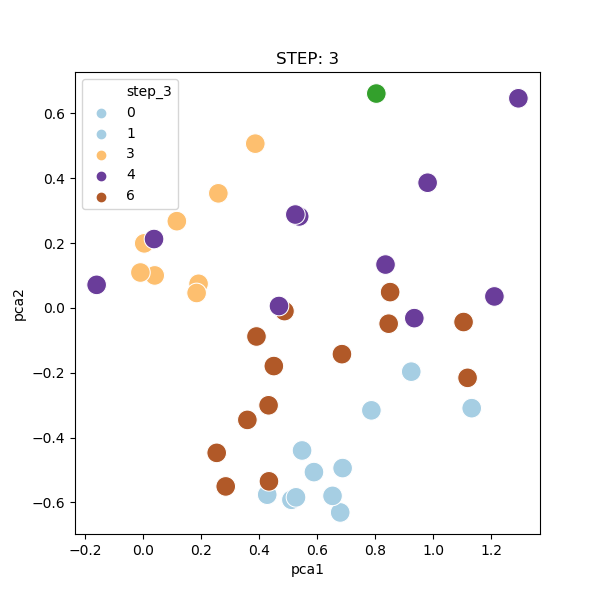

In [12]:
%matplotlib notebook
anim=plotter(df, iteration, "output_2")

# 8. Final Results 

In [13]:
df_out=final_answer(df, iteration, "Cereal", "Cereals", "output_2")
col="step_"+str(iteration-1)
df_out.groupby([col,"Cereal"]).count()

index
step_3 Cereal                        
1      ACCheerios                   1
       CapNCrunch                   1
       CocoaPuffs                   1
       CountChocula                 1
       FrootLoops                   1
       HoneyGrahamOhs               1
       LuckyCharms                  1
       MueslixCrispyBlend           1
       OatmealRaisinCrisp           1
       Smacks                       1
       Trix                         1
2      Cheerios                     1
3      CornFlakes                   1
       Crispix                      1
       Kix                          1
       NutriGrainWheat              1
       Product19                    1
       RiceKrispies                 1
       SpecialK                     1
       TotalCornFlakes              1
4      AllBran                      1
       Cheaties                     1
       CracklinOatBran              1
       FrostedMiniWheats            1
       Life                         1
       PuffedRice                   1
       PuffedWheat                  1
       QuakerOatmeal                1
       RaisinNutBran                1
       TotalWholeGrain              1
5      AppleJacks                   1
       CornPops                     1
       FrostedFlakes                1
       FruitfulBran                 1
       GoldenGrahams                1
       HoneyNutCheerios             1
       JustRightCrunchyNuggets      1
       MultiGrainCheerios           1
       NutNHoneyCrunch              1
       NutriGrainAlmondRaisin       1
       RaisinBran                   1
       TotalRaisinBran              1
       WheatiesHoneyGold            1

# 9. Conclusion

* It seems that cluster 1 is composed of wheats and grains related product
* CLuster 4 contains puffed items 
* Cluster 3 contains corns an rrice related product
* Cluster 5 contains breakfast related brans and oatmenals